In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv('diabetes.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.where(y > 0, 1, 0)

X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [3]:
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc(x))
        return x

In [4]:
learning_rate = 0.1
num_epochs = 2000

model = Perceptron(input_size=X.shape[1])
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

In [5]:
start_time = time.time()
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss = loss.item()
    train_losses.append(train_loss)

    with torch.no_grad():
        train_predictions = (model(X_train) > 0.5).float()
        train_accuracy = accuracy_score(y_train, train_predictions)
        train_accuracies.append(train_accuracy)

    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val.view(-1, 1))
        val_losses.append(val_loss.item())

    val_predictions = (model(X_val) > 0.5).float()
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_accuracies.append(val_accuracy)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, '
              f'Training Accuracy: {train_accuracy * 100:.2f}%, '
              f'Validation Loss: {val_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy * 100:.2f}%')

end_time = time.time()
training_time = end_time - start_time
print(f'Training Time: {training_time:.2f} seconds')


Epoch [100/2000], Training Loss: 0.4870, Training Accuracy: 76.81%, Validation Loss: 0.5044, Validation Accuracy: 79.03%
Epoch [200/2000], Training Loss: 0.4743, Training Accuracy: 77.17%, Validation Loss: 0.4982, Validation Accuracy: 79.03%
Epoch [300/2000], Training Loss: 0.4722, Training Accuracy: 77.54%, Validation Loss: 0.5032, Validation Accuracy: 79.03%
Epoch [400/2000], Training Loss: 0.4717, Training Accuracy: 77.72%, Validation Loss: 0.5074, Validation Accuracy: 77.42%
Epoch [500/2000], Training Loss: 0.4715, Training Accuracy: 77.72%, Validation Loss: 0.5101, Validation Accuracy: 77.42%
Epoch [600/2000], Training Loss: 0.4715, Training Accuracy: 77.72%, Validation Loss: 0.5118, Validation Accuracy: 77.42%
Epoch [700/2000], Training Loss: 0.4715, Training Accuracy: 77.72%, Validation Loss: 0.5127, Validation Accuracy: 77.42%
Epoch [800/2000], Training Loss: 0.4715, Training Accuracy: 77.72%, Validation Loss: 0.5132, Validation Accuracy: 77.42%
Epoch [900/2000], Training Loss:

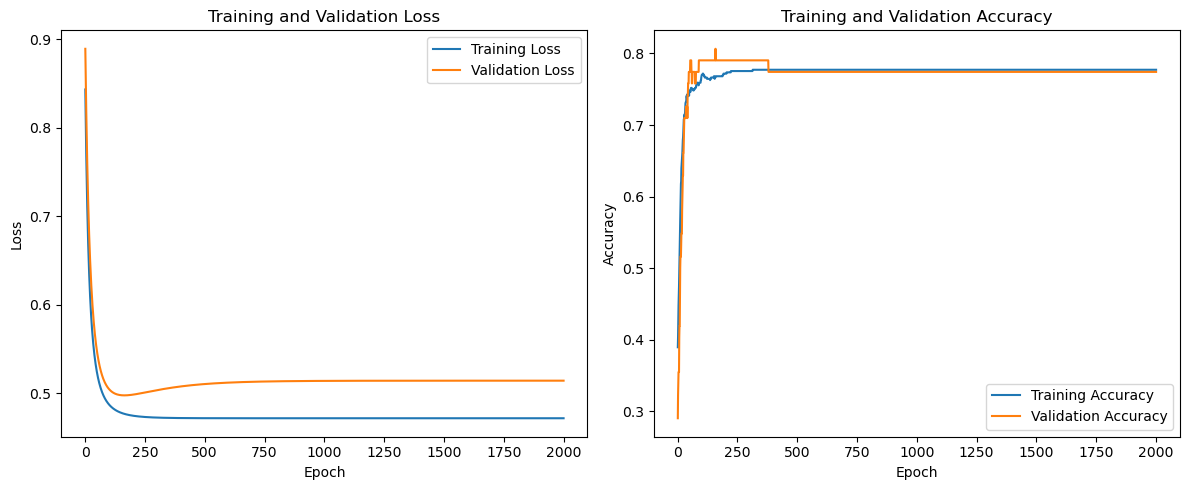

Accuracy: 80.52%
Confusion Matrix:
[[88  8]
 [22 36]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85        96
         1.0       0.82      0.62      0.71        58

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154



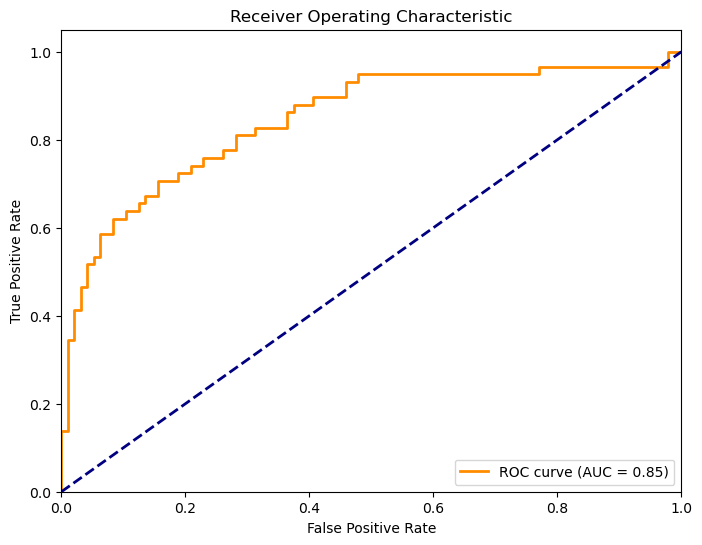

Learning Rate: 0.1
Number of Epochs: 2000
Perceptron(
  (fc): Linear(in_features=8, out_features=1, bias=True)
)


In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

with torch.no_grad():
    predictions = model(X_test)
    predicted_classes = (predictions > 0.5).float()
    
    accuracy = accuracy_score(y_test, predicted_classes)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    cm = confusion_matrix(y_test, predicted_classes)
    print('Confusion Matrix:')
    print(cm)

    print('Classification Report:')
    print(classification_report(y_test, predicted_classes))

    fpr, tpr, _ = roc_curve(y_test, predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

print(f'Learning Rate: {learning_rate}')
print(f'Number of Epochs: {num_epochs}')

print(model)